In [6]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
import pickle
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
def getSimilar():
    imgs_path = "/home/btech/nityanand.mathur/aman/grid/images/"
    imgs_model_width, imgs_model_height = 224, 224

    nb_closest_images = 20  # number of most similar images to retrieve

    # In[19]:

    vgg_model = vgg16.VGG16(weights='imagenet')

    # remove the last layers in order to get features instead of predictions
    feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

    # print the layers of the CNN
    feat_extractor.summary()
    files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x or "jpeg" in x or "png" in x]
    name = "/home/btech/nityanand.mathur/aman/grid/backend/image_24.jpg"
    files.append(name)
    importedImages = []
    print("wip")
    for f in files:
        try:
            filename = f
            original = load_img(filename, target_size=(224, 224))
            numpy_image = img_to_array(original)
            image_batch = np.expand_dims(numpy_image, axis=0)
            importedImages.append(image_batch)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    images = np.vstack(importedImages)

    processed_imgs = preprocess_input(images.copy())
    imgs_features = feat_extractor.predict(processed_imgs)

    print("features successfully extracted!")
    cosSimilarities = cosine_similarity(imgs_features)
    cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
    cos_similarities_df.head()

    def retrieve_most_similar_products(given_img):
        original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1].index
        closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images + 1]
        ci = []
        for i in range(0, len(closest_imgs)):
            original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
            plt.imshow(original)
            plt.show()
            print("similarity score : ",closest_imgs_scores[i])
            ci.append(os.path.basename(closest_imgs[i]))
            ci.append(str(closest_imgs_scores[i]))
        return ci
    files.remove(name)
    l = retrieve_most_similar_products(name)
    return l




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

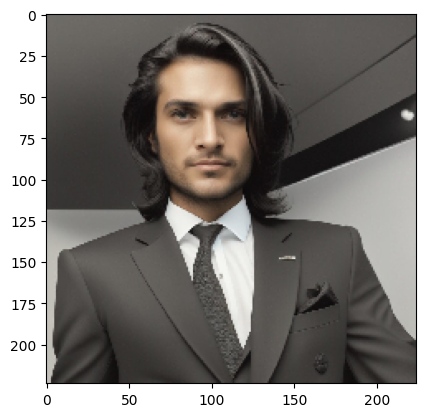

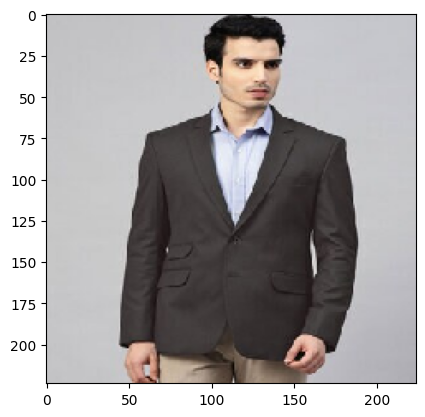

similarity score :  0.7717838


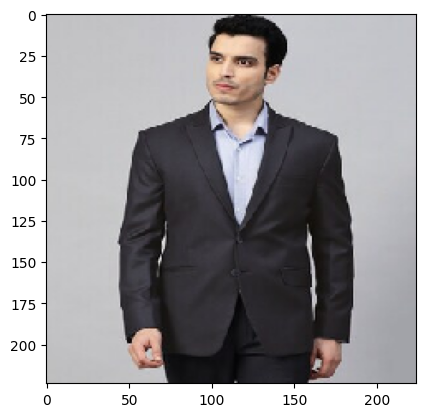

similarity score :  0.7521208


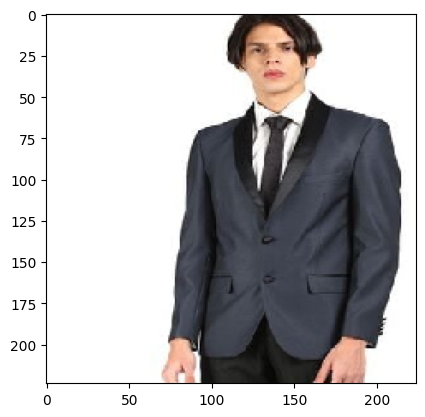

similarity score :  0.74831796


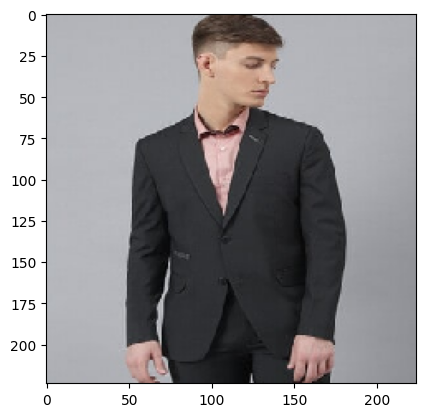

similarity score :  0.7460387


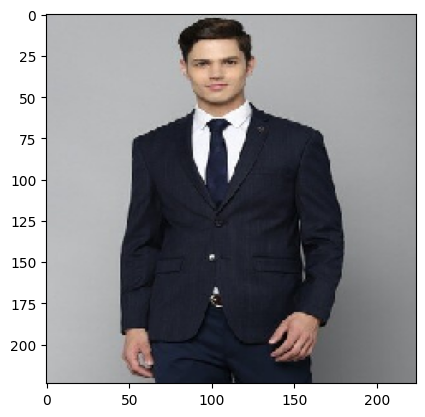

similarity score :  0.74240154


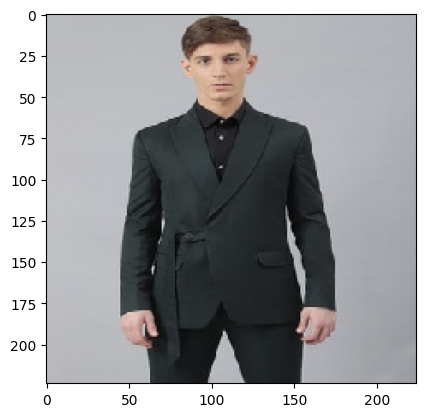

similarity score :  0.74239254


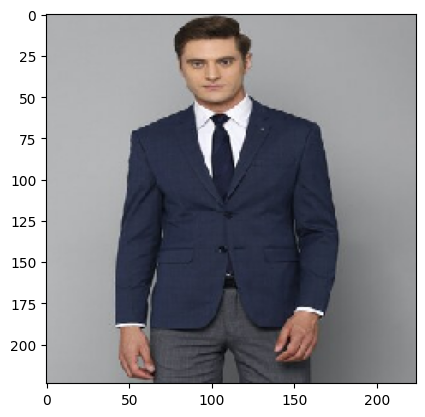

similarity score :  0.7421328


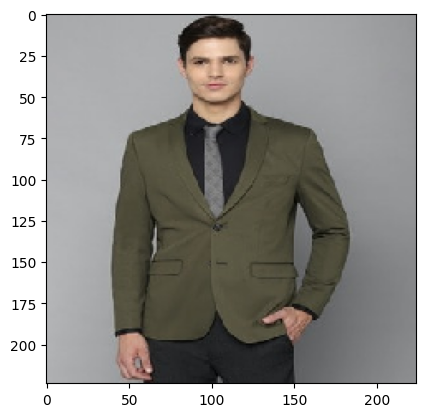

similarity score :  0.741082


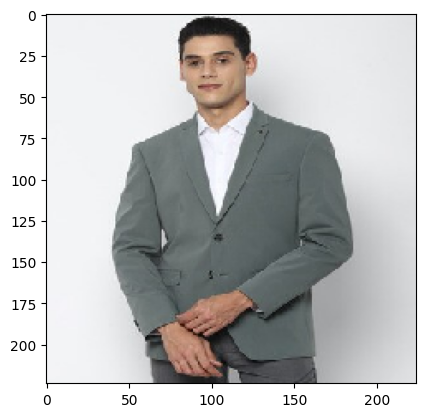

similarity score :  0.740521


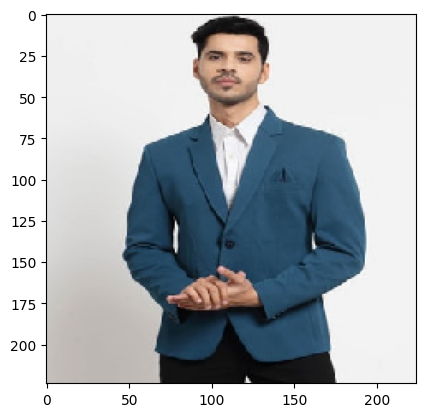

similarity score :  0.73806053


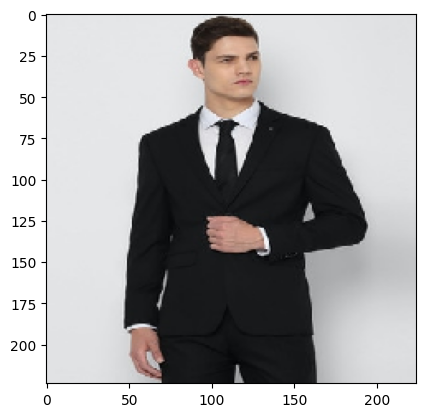

similarity score :  0.7373442


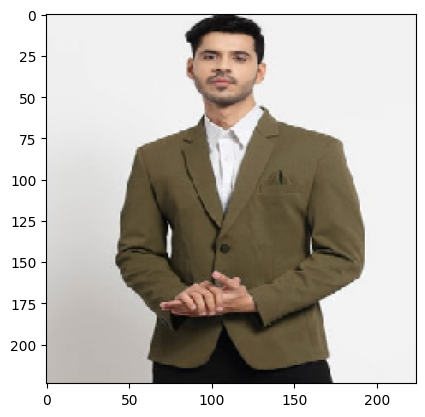

similarity score :  0.7369136


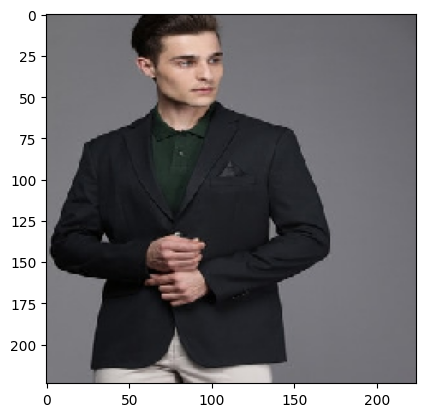

similarity score :  0.7364406


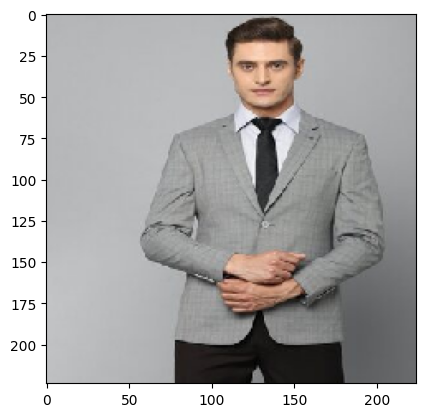

similarity score :  0.7339847


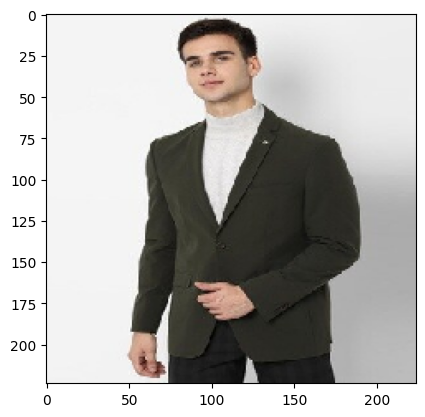

similarity score :  0.7331905


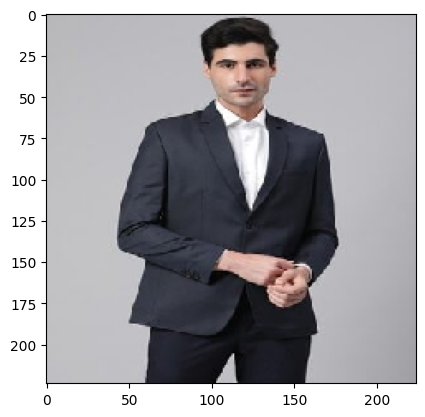

similarity score :  0.7306871


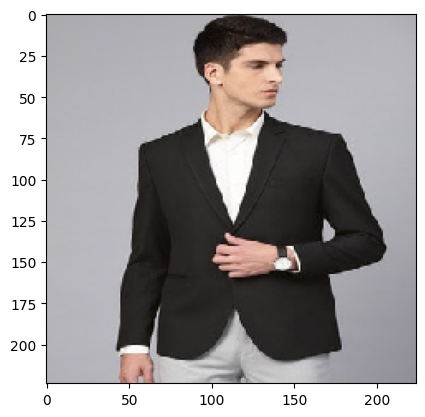

similarity score :  0.7305621


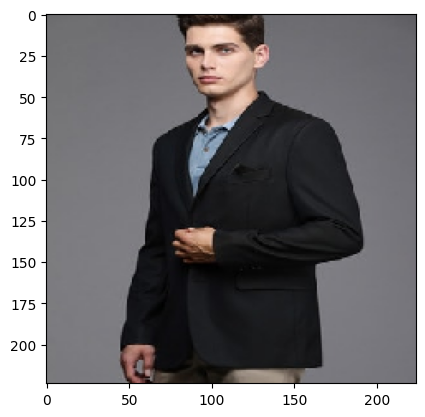

similarity score :  0.72799176


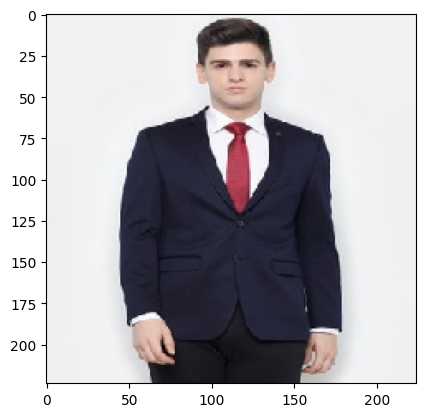

similarity score :  0.72662044


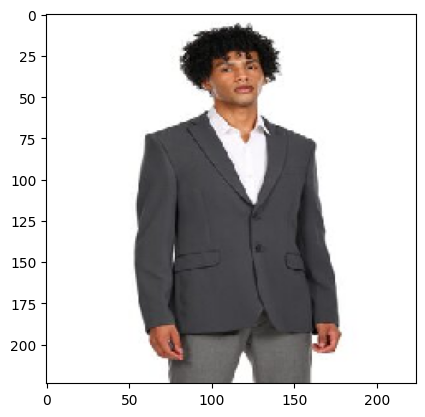

similarity score :  0.7255354


In [7]:
a= getSimilar()

In [5]:
a

['461814374003.jpg',
 '0.7717838',
 '461873933002.jpg',
 '0.7521208',
 '469021196004.jpg',
 '0.74831796',
 '464310621003.jpg',
 '0.7460387',
 '469220574004.jpg',
 '0.74240154',
 '464310504002.jpg',
 '0.74239254',
 '469220009005.jpg',
 '0.7421328',
 '469220158005.jpg',
 '0.741082',
 '469037085006.jpg',
 '0.740521',
 '464234849002.jpg',
 '0.73806053',
 '469194455005.jpg',
 '0.7373442',
 '464234831005.jpg',
 '0.7369136',
 '464044298004.jpg',
 '0.7364406',
 '469220639003.jpg',
 '0.7339847',
 '460727061004.jpg',
 '0.7331905',
 '463893878002.jpg',
 '0.7306871',
 '461387599003.jpg',
 '0.7305621',
 '464044292002.jpg',
 '0.72799176',
 '469173558002.jpg',
 '0.72662044',
 '460998978002.jpg',
 '0.7255354']

In [8]:
a

['461814374003.jpg',
 '0.7717838',
 '461873933002.jpg',
 '0.7521208',
 '469021196004.jpg',
 '0.74831796',
 '464310621003.jpg',
 '0.7460387',
 '469220574004.jpg',
 '0.74240154',
 '464310504002.jpg',
 '0.74239254',
 '469220009005.jpg',
 '0.7421328',
 '469220158005.jpg',
 '0.741082',
 '469037085006.jpg',
 '0.740521',
 '464234849002.jpg',
 '0.73806053',
 '469194455005.jpg',
 '0.7373442',
 '464234831005.jpg',
 '0.7369136',
 '464044298004.jpg',
 '0.7364406',
 '469220639003.jpg',
 '0.7339847',
 '460727061004.jpg',
 '0.7331905',
 '463893878002.jpg',
 '0.7306871',
 '461387599003.jpg',
 '0.7305621',
 '464044292002.jpg',
 '0.72799176',
 '469173558002.jpg',
 '0.72662044',
 '460998978002.jpg',
 '0.7255354']

In [9]:
import os
import shutil

def copy_even_index_images(image_names, source_path, destination_path):
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)

    for index, image_name in enumerate(image_names):
        if index % 2 == 0:  # Check if index is even
            image_path = os.path.join(source_path, image_name)
            if os.path.exists(image_path):
                destination_image_path = os.path.join(destination_path, image_name)
                shutil.copy(image_path, destination_image_path)
                print(f"Copied {image_name} to {destination_path}")
            else:
                print(f"Image {image_name} not found in {source_path}")

# Example usage
image_names_to_copy = a
source_directory = "/home/btech/nityanand.mathur/aman/grid/images"
destination_directory = "/home/btech/nityanand.mathur/aman/grid/backend/my_images"

copy_even_index_images(image_names_to_copy, source_directory, destination_directory)


Copied 461814374003.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 461873933002.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 469021196004.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 464310621003.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 469220574004.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 464310504002.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 469220009005.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 469220158005.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 469037085006.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 464234849002.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 469194455005.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my_images
Copied 464234831005.jpg to /home/btech/nityanand.mathur/aman/grid/backend/my